# Mentoria

### Hito 2 - Practico de Exploracion y Curacion



In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from statusFixer import statusFixer
import datetime

#!pip install python-decouple
#from decouple import config
from sqlalchemy import create_engine, text

sns.set_context('talk')

### Cargamos el dataset completo con los montos

In [2]:
df_m19 = pd.read_csv("df_m19.csv")
df_m19.head()

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda
0,19605119,787994,323,08/10/2019 11:00:00,341,269,1438679,102,9269,23/09/2019,1111,B,1438679,"44121,12"
1,19605188,787994,8,08/10/2019 11:04:00,341,269,1438679,102,9269,23/09/2019,1111,B,1438679,"44121,12"
2,19605113,787994,323,08/10/2019 10:59:00,341,269,1438679,102,9269,23/09/2019,1111,B,1438679,"44121,12"
3,19734817,787994,330,12/10/2019 11:05:00,341,269,1438679,102,9269,23/09/2019,1111,B,1438679,"44121,12"
4,19879460,787994,13,17/10/2019 10:56:00,341,269,1438679,102,9269,23/09/2019,1111,B,1438679,"44121,12"


In [3]:
df_m19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914144 entries, 0 to 5914143
Data columns (total 14 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   seg_id        int64 
 1   prs_id        int64 
 2   seg_codigo    int64 
 3   hora          object
 4   seg_usuario   int64 
 5   obn_acreedor  int64 
 6   obn_interno   int64 
 7   obn_producto  int64 
 8   obn_cabecera  int64 
 9   fecha_alta    object
 10  obn_estudio   int64 
 11  estado        object
 12  obn_id        int64 
 13  monto_deuda   object
dtypes: int64(10), object(4)
memory usage: 631.7+ MB


Las columnas hora, fecha_alta y monto_deuda, hay que cambiarlas de tipo. Las dos primeras hay que pasarlas a date, la ultima a float64.

### Cambiamos el tipo de la variable monto_deuda

In [4]:
m19_df=df_m19.copy()
print(m19_df.monto_deuda.dtypes)

object


In [5]:
m19_df['monto_deuda'] = m19_df.monto_deuda.str.replace(',','.').astype('float')  

In [6]:
m19_df.monto_deuda.dtypes

dtype('float64')

### Cambiamos el tipo de las variables fecha_alta y hora

In [7]:
m19_df['hora'] = pd.to_datetime(m19_df['hora'], format='%d/%m/%Y %H:%M:%S')
m19_df['fecha_alta']  = pd.to_datetime(m19_df['fecha_alta'], format='%d/%m/%Y')

In [8]:
m19_df.hora.dtypes

dtype('<M8[ns]')

In [9]:
m19_df.fecha_alta.dtypes

dtype('<M8[ns]')

In [10]:
m19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914144 entries, 0 to 5914143
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   seg_id        int64         
 1   prs_id        int64         
 2   seg_codigo    int64         
 3   hora          datetime64[ns]
 4   seg_usuario   int64         
 5   obn_acreedor  int64         
 6   obn_interno   int64         
 7   obn_producto  int64         
 8   obn_cabecera  int64         
 9   fecha_alta    datetime64[ns]
 10  obn_estudio   int64         
 11  estado        object        
 12  obn_id        int64         
 13  monto_deuda   float64       
dtypes: datetime64[ns](2), float64(1), int64(10), object(1)
memory usage: 631.7+ MB


### Datos Faltantes

Visualizamos si hay datos faltantes

<AxesSubplot:>

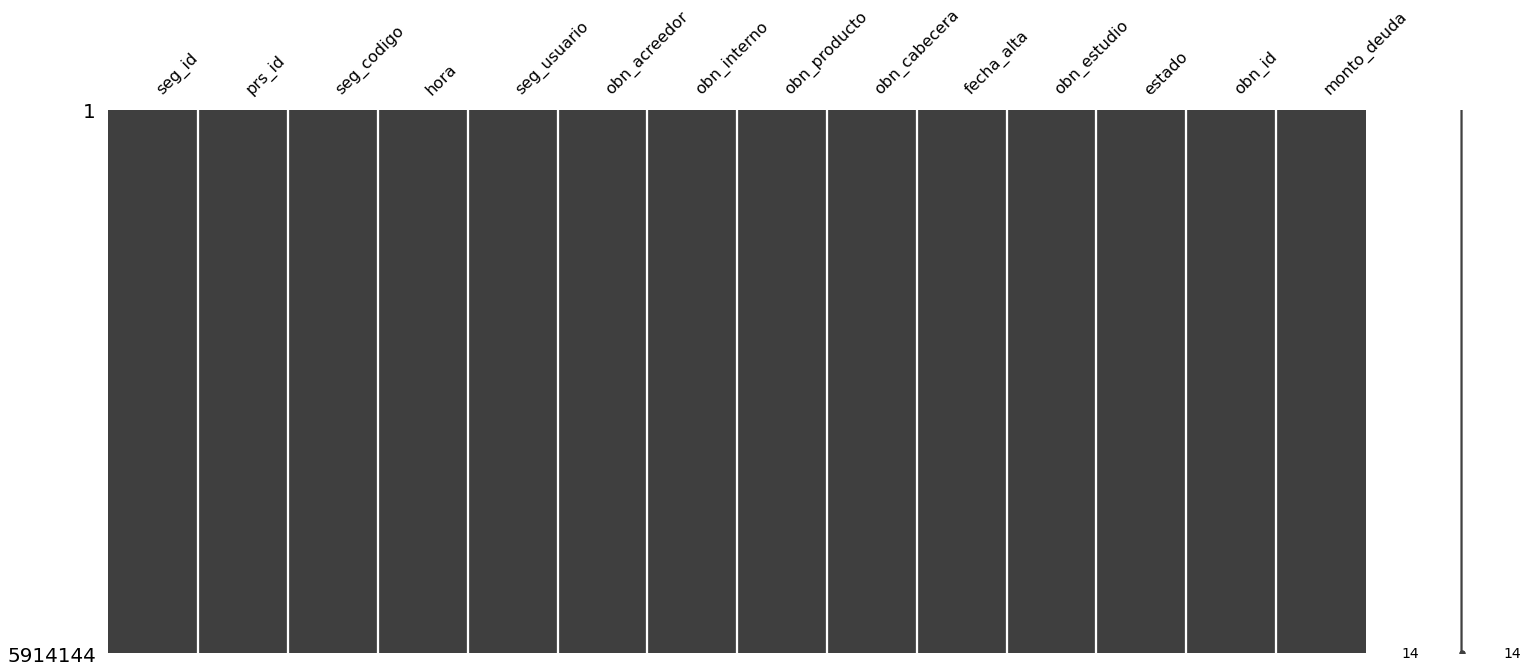

In [11]:
import missingno as msno
msno.matrix(m19_df)#.sample(10000,random_state=123));

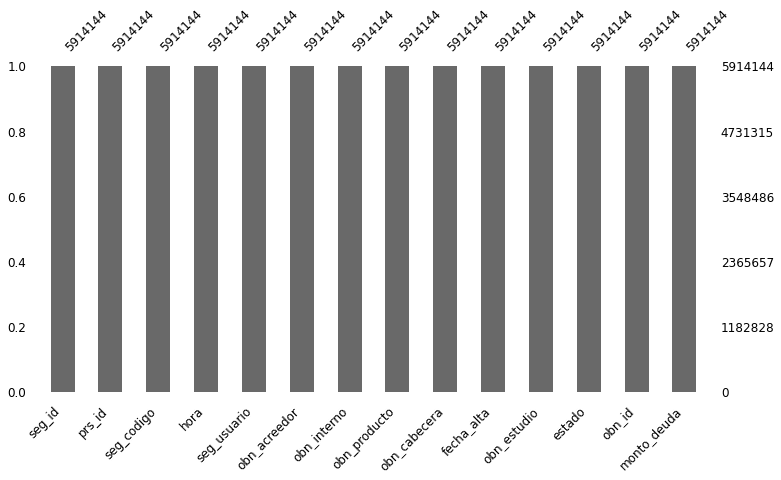

In [12]:
msno.bar(m19_df,figsize=(12, 6), sort="ascending",fontsize=12) ;

A simple vista no pareceria haber datos faltantes, procedemos a hacer un analisis de las variables para verificarlo.

### Atributos categoricos

Verificamos descriptivos basicos de la unica variable categorica **estado**

In [13]:
m19_df['estado'].describe()

count                    5914144
unique                        51
top       B                     
freq                     1368086
Name: estado, dtype: object

In [47]:
m19_df['estado'] = m19_df['estado'].apply(statusFixer)
m19_df.estado.value_counts()

B    3400098
A    1307927
C    1006819
R     149058
L      43808
O       6434
Name: estado, dtype: int64

### Atributos numericos, numericos ordinales y datetimes

Ploteamos histogramas para ver la distribucion y la relacion con los descriptivos. Mas que nada es para verificar que no haya datos faltantes y que el valor de los descriptivos se refleje en la distribucion ya que el unico que tendria valor estadistico es el de montos.

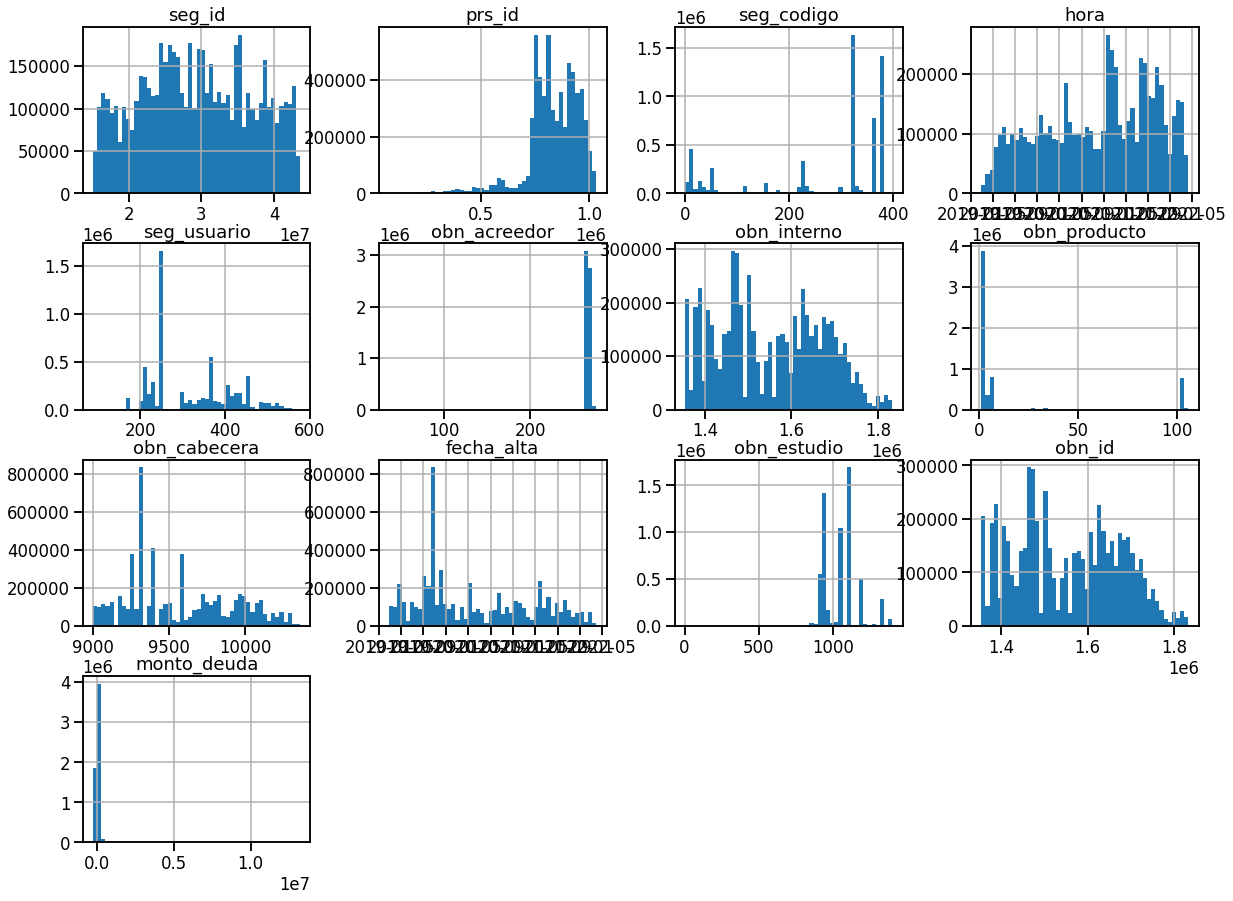

In [15]:
%matplotlib inline 
import matplotlib.pyplot as plt
m19_df.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
m19_df.describe(datetime_is_numeric=True)

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,obn_id,monto_deuda
count,5.914144e+06,5.914144e+06,5.914144e+06,5914144,5.914144e+06,5.914144e+06,5.914144e+06,5.914144e+06,5.914144e+06,5914144,5.914144e+06,5.914144e+06,5.914144e+06
mean,2.937952e+07,8.329654e+05,2.687217e+02,2020-12-02 15:53:24.070835200,3.216265e+02,2.661654e+02,1.552520e+06,1.627920e+01,9.571122e+03,2020-06-08 19:53:11.657699840,1.050067e+03,1.552520e+06,4.941530e+04
min,1.512041e+07,7.412500e+04,0.000000e+00,2019-02-26 15:30:00,8.800000e+01,3.600000e+01,1.354293e+06,1.000000e+00,9.002000e+03,2019-02-26 00:00:00,4.000000e+00,1.354293e+06,-2.561480e+05
25%,2.342845e+07,7.693940e+05,2.240000e+02,2020-03-26 17:08:50,2.480000e+02,2.640000e+02,1.458365e+06,1.000000e+00,9.323000e+03,2019-10-28 00:00:00,9.400000e+02,1.458365e+06,9.388400e+03
50%,2.925603e+07,8.401000e+05,3.260000e+02,2021-01-28 10:51:16,3.000000e+02,2.660000e+02,1.549117e+06,1.000000e+00,9.497000e+03,2020-03-05 00:00:00,1.042000e+03,1.549117e+06,2.792193e+04
75%,3.551007e+07,9.233400e+05,3.610000e+02,2021-08-18 15:56:57,4.030000e+02,2.690000e+02,1.653726e+06,6.000000e+00,9.863000e+03,2021-03-08 00:00:00,1.112000e+03,1.653726e+06,6.230000e+04
max,4.358401e+07,1.032616e+06,3.990000e+02,2022-04-11 14:50:56,5.770000e+02,2.770000e+02,1.833294e+06,1.060000e+02,1.036100e+04,2022-03-30 00:00:00,1.397000e+03,1.833294e+06,1.321812e+07
std,7.612296e+06,1.261337e+05,1.319503e+02,NaN,9.649950e+01,1.281352e+01,1.200331e+05,3.442925e+01,3.460985e+02,NaN,1.165079e+02,1.200331e+05,8.748851e+04


In [17]:
missing_values_count = m19_df.isna().sum()
missing_values_count

seg_id          0
prs_id          0
seg_codigo      0
hora            0
seg_usuario     0
obn_acreedor    0
obn_interno     0
obn_producto    0
obn_cabecera    0
fecha_alta      0
obn_estudio     0
estado          0
obn_id          0
monto_deuda     0
dtype: int64

Se verifica que no hay datos faltantes

### Correlacion entre monto_deuda y los demas atributos

In [18]:
m19_df_sample = m19_df.sample(10000,random_state=123)
m19_df_sample

,seg_id,prs_id,seg_codigo,hora,seg_usuario,obn_acreedor,obn_interno,obn_producto,obn_cabecera,fecha_alta,obn_estudio,estado,obn_id,monto_deuda
1965630,30049347,837737,379,2021-02-10 10:42:08,248,264,1524967,1,9450,2020-01-24,940,B,1524967,115486.97
4297007,31645081,930407,379,2021-04-05 16:10:44,248,269,1650176,102,9825,2021-02-08,1093,B,1650176,15568.84
3129264,31232773,902341,9,2021-03-18 14:58:59,384,264,1612328,1,9693,2020-09-24,1040,B,1612328,154000.00
1902803,21935558,807573,33,2020-01-17 10:52:12,438,270,1472918,6,9325,2019-10-28,1112,A,1472918,97.99
112724,26986660,762945,224,2020-10-15 11:50:55,205,268,1421834,2,9247,2019-08-29,1091,C,1421834,5200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913348,39003093,807558,379,2021-11-08 17:16:10,248,270,1472891,3,9325,2019-10-28,1112,A,1472891,1242.74
4491750,33793248,309421,9,2021-06-29 14:37:38,488,269,1654523,1,9863,2021-03-08,1332,B,1654523,171254.79
3005695,28073505,893615,58,2020-12-15 12:39:26,427,264,1598187,1,9633,2020-07-24,940,C,1598187,82000.00
1485055,27142166,674674,26,2020-10-20 10:03:24,219,270,1480196,2,9326,2019-10-28,1112,A,1480196,36451.35


In [19]:
corr_matrix = m19_df_sample.corr()
corr_matrix['monto_deuda'].sort_values(ascending=False)

monto_deuda     1.000000
obn_cabecera    0.131220
obn_interno     0.126475
obn_id          0.126475
prs_id          0.080985
seg_usuario     0.072135
seg_id          0.065430
obn_estudio     0.051009
obn_acreedor    0.017279
obn_producto    0.013340
seg_codigo      0.008504
Name: monto_deuda, dtype: float64

Vemos que los valores de correlacion son bastante bajos. Tomamos los mas representativos y los ploteamos

array([[<AxesSubplot:xlabel='monto_deuda', ylabel='monto_deuda'>,
        <AxesSubplot:xlabel='obn_cabecera', ylabel='monto_deuda'>,
        <AxesSubplot:xlabel='obn_interno', ylabel='monto_deuda'>,
        <AxesSubplot:xlabel='prs_id', ylabel='monto_deuda'>],
       [<AxesSubplot:xlabel='monto_deuda', ylabel='obn_cabecera'>,
        <AxesSubplot:xlabel='obn_cabecera', ylabel='obn_cabecera'>,
        <AxesSubplot:xlabel='obn_interno', ylabel='obn_cabecera'>,
        <AxesSubplot:xlabel='prs_id', ylabel='obn_cabecera'>],
       [<AxesSubplot:xlabel='monto_deuda', ylabel='obn_interno'>,
        <AxesSubplot:xlabel='obn_cabecera', ylabel='obn_interno'>,
        <AxesSubplot:xlabel='obn_interno', ylabel='obn_interno'>,
        <AxesSubplot:xlabel='prs_id', ylabel='obn_interno'>],
       [<AxesSubplot:xlabel='monto_deuda', ylabel='prs_id'>,
        <AxesSubplot:xlabel='obn_cabecera', ylabel='prs_id'>,
        <AxesSubplot:xlabel='obn_interno', ylabel='prs_id'>,
        <AxesSubplot:xlabel='

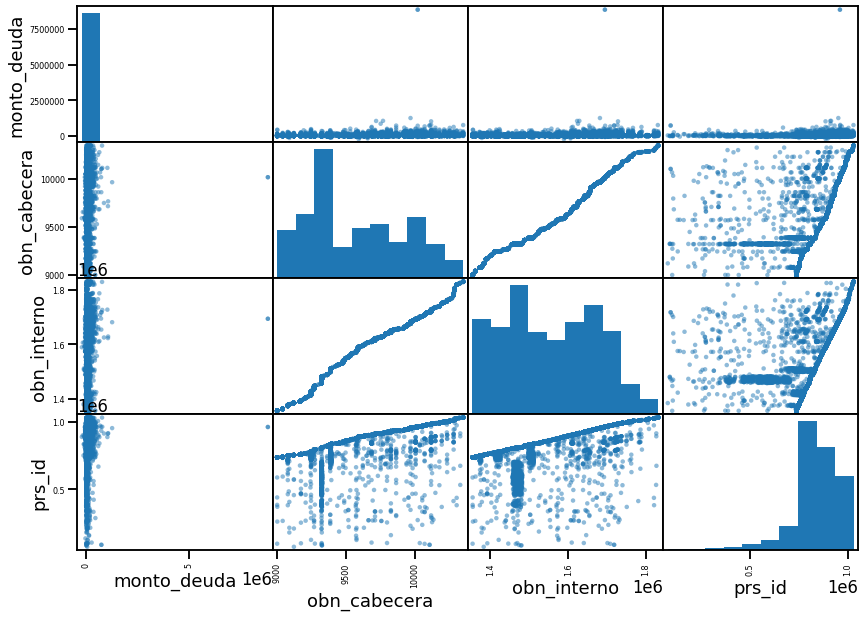

In [20]:
from pandas.plotting import scatter_matrix

attributes = ['monto_deuda', 'obn_cabecera', 'obn_interno', 'prs_id']

scatter_matrix(m19_df_sample[attributes], figsize=(14, 10))

Se observa que la correlacion de obn_cabecera, obn_interno y prs_id con monto_deuda siguen siendo muy poco representativas. Por otro lado se observa una alta correlacion entre obn_interno y obn_cabecera.

### Individuos que se repiten en los distintos años

In [32]:
prs_2019 = set(m19_df[(m19_df['hora']>'2019-01-01 00:00') & (m19_df['hora']<'2020-01-01 00:00')].prs_id.to_list())
prs_2020 = set(m19_df[(m19_df['hora']>'2020-01-01 00:00') & (m19_df['hora']<'2021-01-01 00:00')].prs_id.to_list())
prs_2021 = set(m19_df[(m19_df['hora']>'2021-01-01 00:00') & (m19_df['hora']<'2022-01-01 00:00')].prs_id.to_list())
prs_2022 = set(m19_df[(m19_df['hora']>'2022-01-01 00:00') & (m19_df['hora']<'2023-01-01 00:00')].prs_id.to_list())

In [43]:
len(prs_2019 & prs_2020 & prs_2021 & prs_2022)

5795

Hay 5795 individuos que se repiten los cuatro años

### Estados 'B' - NO ENTENDI HAY QUE DROPEARLOS?

In [50]:
ratio_B_state = m19_df.estado.value_counts().B/len(m19_df)
ratio_B_state

0.5749095727124669

Equivalen a casi el 60% del dataset

### Estados 'C'

In [52]:
ratio_C_state = m19_df.estado.value_counts().C/len(m19_df)
ratio_C_state

0.17023917577928438

Se cancelaron el 17% de las deudas en el dataset, es decir, hay un 17% de casos exitosos.